In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:**

Data Exploration and Understanding:

In [2]:
#  Dataset Overview:

# Load the dataset and display the first 10 rows
df = pd.read_csv("/content/drive/MyDrive/Assignment/World Happiness Report.csv")
print(df.head(10))

# Identify the number of rows and columns in the dataset.
rows= df.shape[0]
columns= df.shape[1]
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

# List all the columns and their data types.
print(df.dtypes)

# Basic Statistics:

# Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()
print(f"Mean Score: {mean_score:.3f}")
print(f"Median Score: {median_score:.3f}")
print(f"Standard Deviation of Score: {std_dev_score:.3f}")

# Identify the country with the highest and lowest happiness scores.
highest_score = df.loc[df['score'].idxmax(), ['Country name','score']]
lowest_score = df.loc[df['score'].idxmin(), ['Country name','score']]
print(f"Country with highest happiness score:\n {highest_score}")
print(f"Country with lowest happiness score:\n {lowest_score}")

# Missing Values:

# Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Filtering and Sorting:

# Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score'] > 7.5]

# For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print(sorted_filtered_df.head(10))

# Adding New Columns:

# Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
def happiness(score):
    if score > 6:
        return 'High'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'Low'
df['Happiness Category'] = df['score'].apply(happiness)
print(df[['Country name','Happiness Category']].head())





  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

**Data Visualizations:**

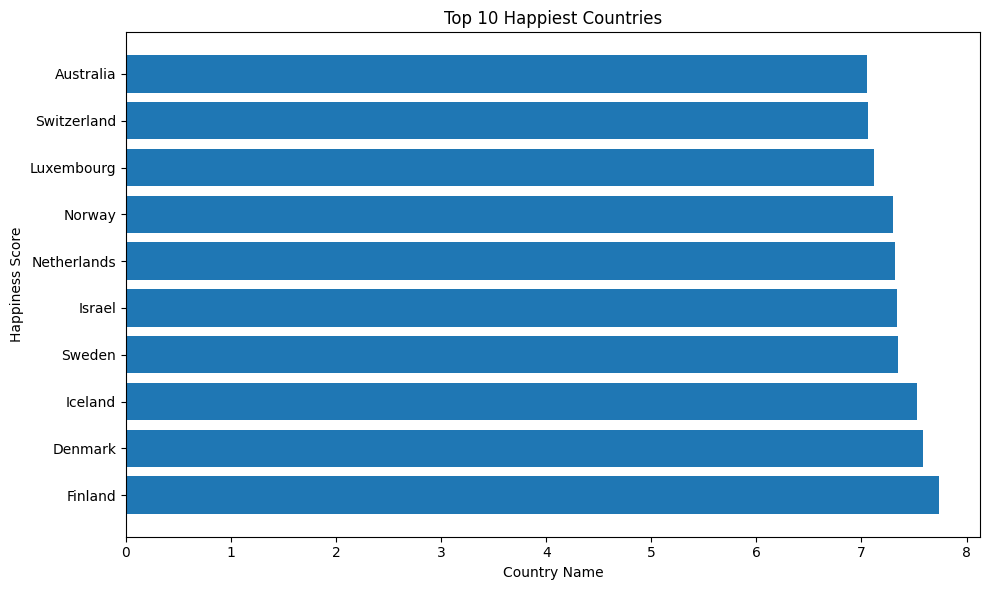

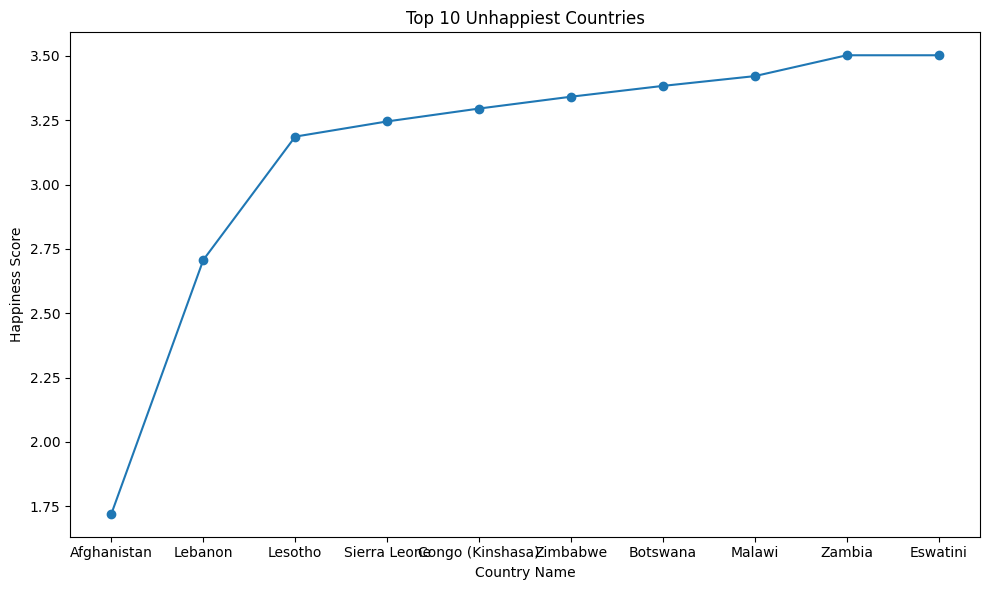

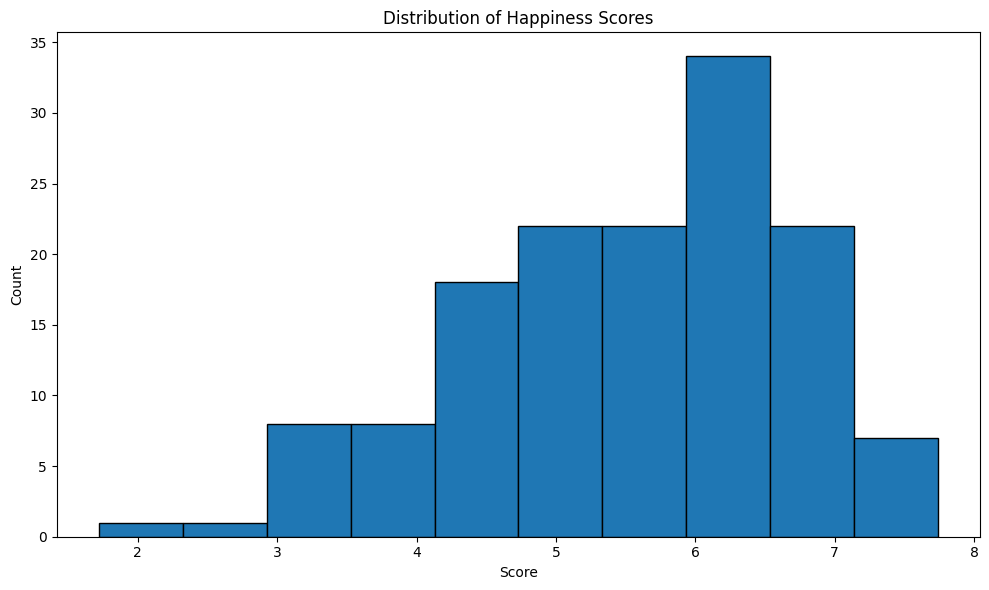

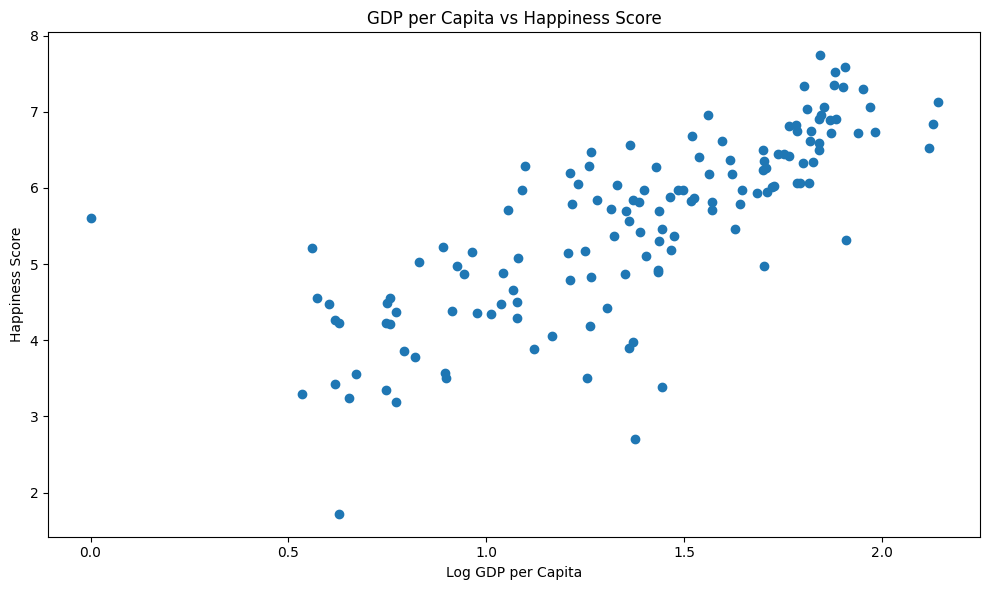

In [3]:
# Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
happiest_countries = df.nlargest(10, 'score')
plt.figure(figsize=(10,6))
plt.barh(happiest_countries['Country name'], happiest_countries['score'])
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.tight_layout()
plt.show()

#  Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
unhappiest_countries = df.nsmallest(10, 'score')
plt.figure(figsize=(10,6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o')
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.tight_layout()
plt.show()

# Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(10,6))
plt.hist(df['score'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10,6))
plt.scatter(df['Log GDP per capita'], df['score'], alpha=1)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('GDP per Capita vs Happiness Score')
plt.tight_layout()
plt.show()

**Problem - 2 - Some Advance Data Exploration Task:**

Setup Task - Preparing the South-Asia Dataset:

In [4]:
# Define the countries in South Asia with a list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
print(south_asia_df)

# Save the filtered dataframe as separate CSV files for future use.
south_asia_df.to_csv("South_Asia_Happiness_Report.csv", index=False)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

Composite Score Ranking:

    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


/tmp/ipython-input-1465314118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] + 0.30 * south_asia_df['Social support'] + 0.30 * south_asia_df['Healthy life expectancy'])


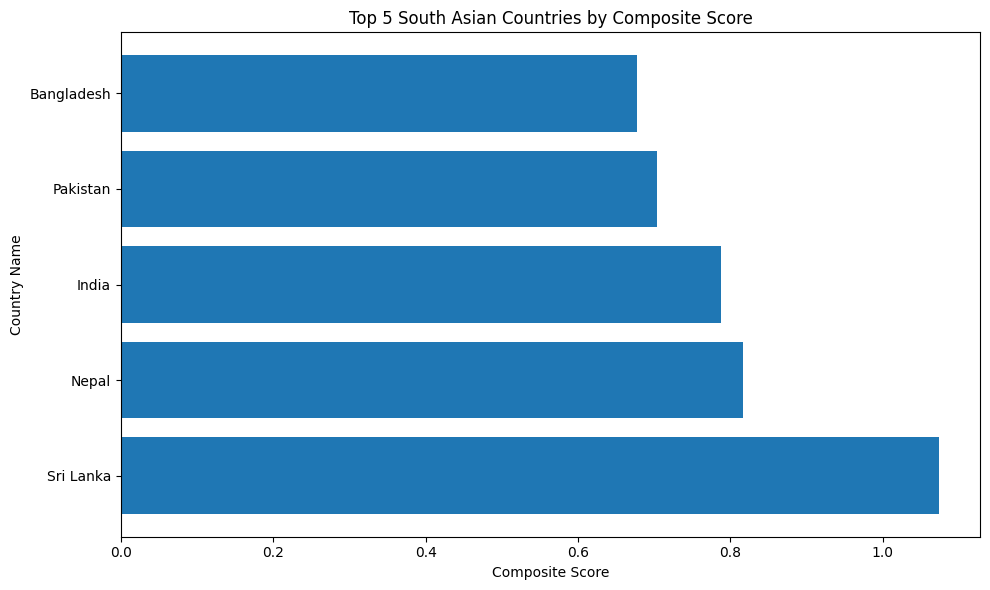

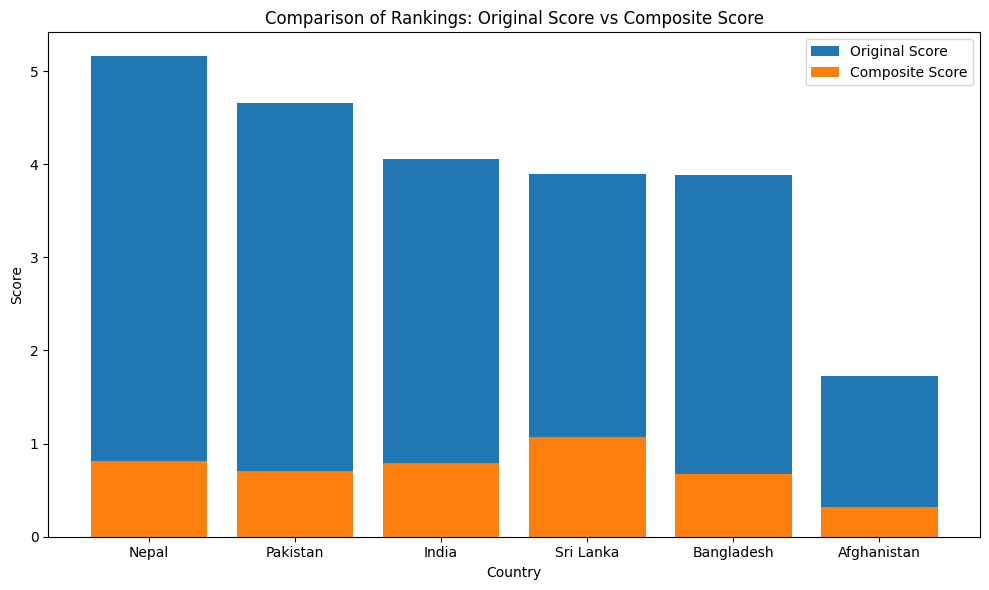

In [5]:
# Using the SouthAsia DataFrame, create a new column called Composite Score.

south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] + 0.30 * south_asia_df['Social support'] + 0.30 * south_asia_df['Healthy life expectancy'])
print(south_asia_df[['Country name', 'Composite Score']])

# Rank the South Asian countries based on the Composite Score in descending order.
ranked_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print(ranked_df[['Country name', 'Composite Score']])

# Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top_5_south_asia = ranked_df.head(5)
plt.figure(figsize=(10,6))
plt.barh(top_5_south_asia['Country name'], top_5_south_asia['Composite Score'])
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.tight_layout()
plt.show()

# Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.
sorted_original = south_asia_df.sort_values(by='score', ascending=False)
sorted_composite = south_asia_df.sort_values(by='Composite Score', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(sorted_original['Country name'], sorted_original['score'], label='Original Score')
plt.bar(sorted_composite['Country name'], sorted_composite['Composite Score'],label='Composite Score')
plt.xlabel("Country")
plt.ylabel("Score")
plt.title("Comparison of Rankings: Original Score vs Composite Score")
plt.legend()
plt.tight_layout()
plt.show()

Outlier Detection:

    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


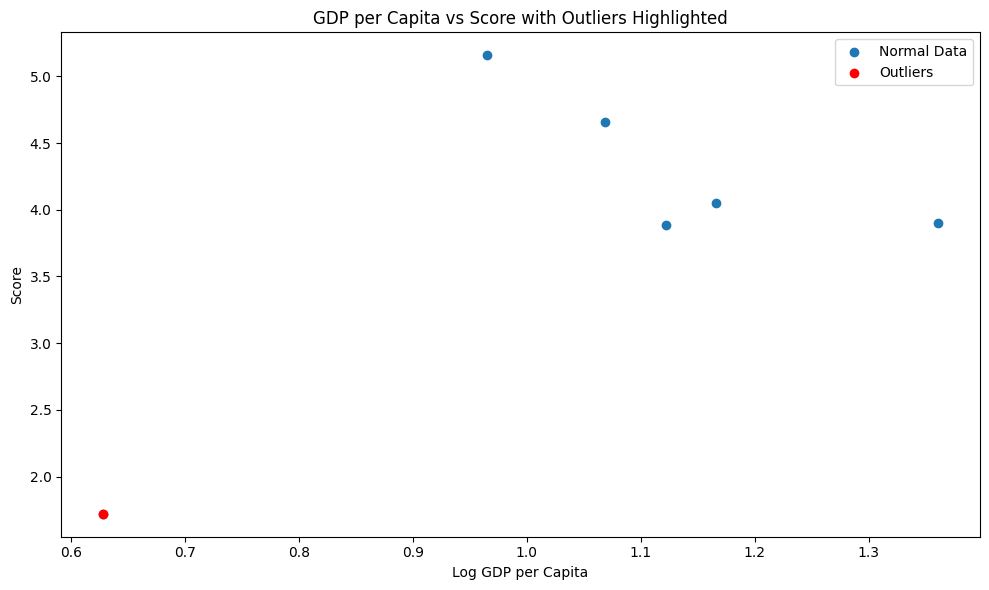

In [6]:
# Identify outlier countries in South Asia based on their Score and GDP per Capita.
# Define outliers using the 1.5 × IQR rule.
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers
outlier_scores = identify_outliers(south_asia_df['score'])
outlier_gdp = identify_outliers(south_asia_df['Log GDP per capita'])
outlier_countries = south_asia_df[
    south_asia_df['score'].isin(outlier_scores) |
    south_asia_df['Log GDP per capita'].isin(outlier_gdp)
]
print(outlier_countries[['Country name', 'score', 'Log GDP per capita']])

#Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
plt.figure(figsize=(10,6))
outlier = south_asia_df[south_asia_df['score'].isin(outlier_scores) | south_asia_df['Log GDP per capita'].isin(outlier_gdp)]
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], alpha=1, label='Normal Data')
plt.scatter(outlier['Log GDP per capita'], outlier['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('GDP per Capita vs Score with Outliers Highlighted')
plt.legend()
plt.tight_layout()
plt.show()

Exploring Trends Across Metrics:

Correlation between Score and Freedom to make life choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192


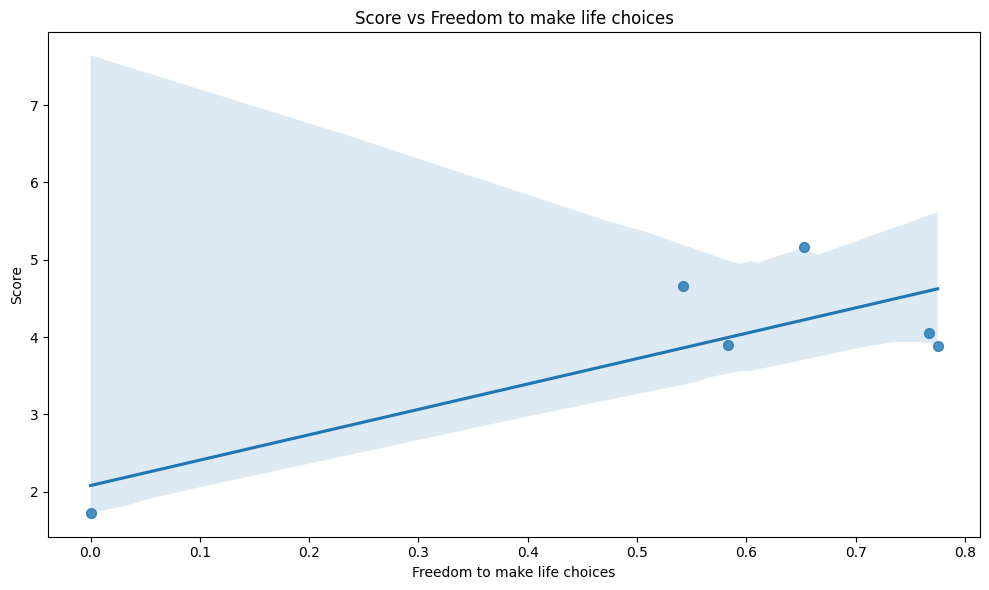

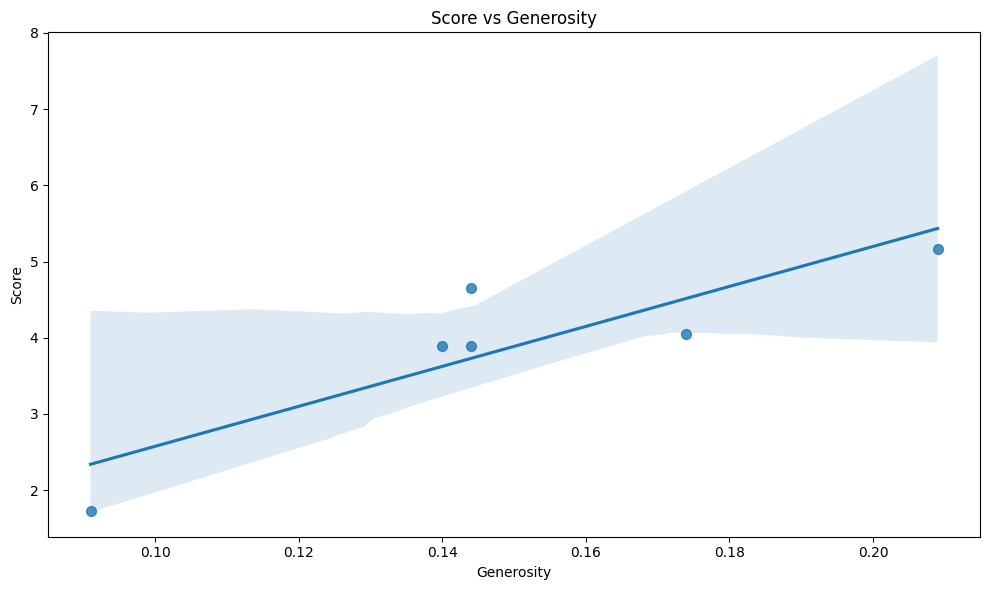

In [7]:
# Choose two metrics and calculate their correlation with the Score for South Asian countries.
metric1 = 'Freedom to make life choices'
metric2 = 'Generosity'
correlation1 = south_asia_df['score'].corr(south_asia_df[metric1])
correlation2 = south_asia_df['score'].corr(south_asia_df[metric2])
print(f"Correlation between Score and Freedom to make life choices: {correlation1}")
print(f"Correlation between Score and Generosity: {correlation2}")

# Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(10,6))
sns.regplot(x=metric1, y='score', data=south_asia_df, scatter_kws={'s':50})
plt.title(f'Score vs {metric1}')
plt.xlabel(metric1)
plt.ylabel('Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x=metric2, y='score', data=south_asia_df, scatter_kws={'s':50})
plt.title(f'Score vs {metric2}')
plt.xlabel(metric2)
plt.ylabel('Score')
plt.tight_layout()
plt.show()

Gap Analysis:

    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
142  Afghanistan         -1.093
Countries ranked by GDP-Score Gap (Ascending):     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
Countries ranked by GDP-Score Gap (Descending):     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


/tmp/ipython-input-3560437230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


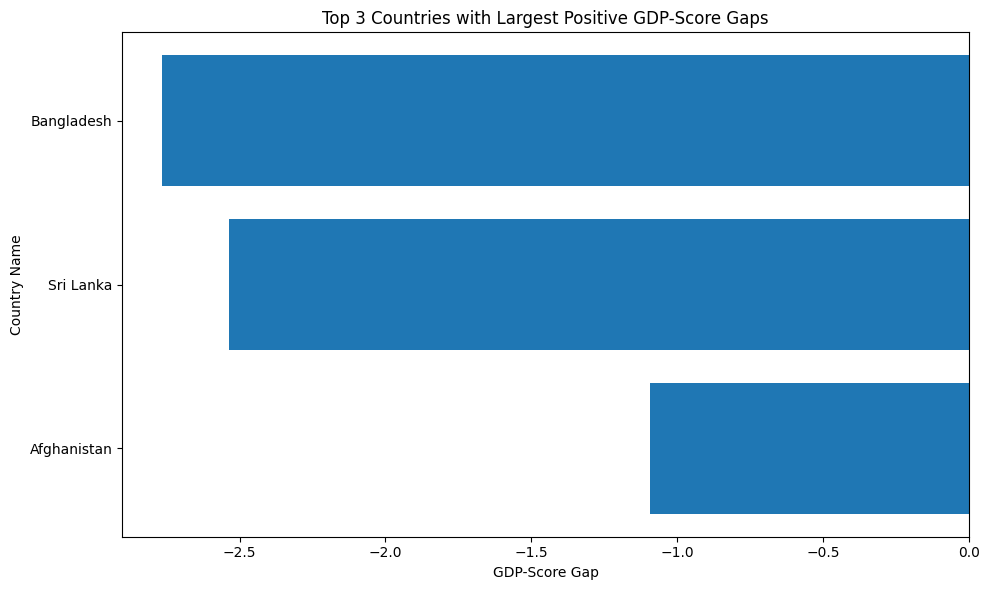

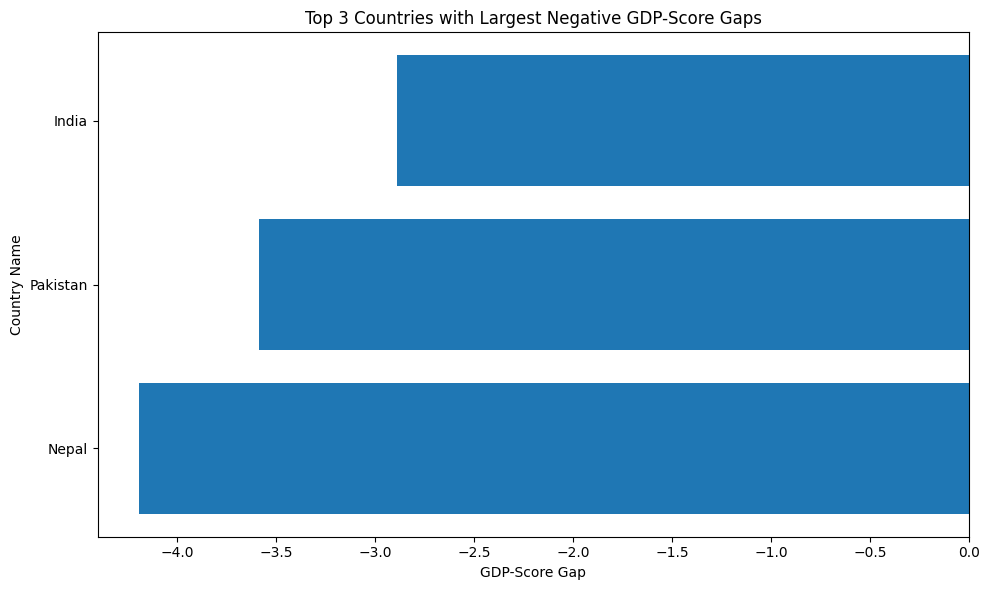

In [8]:
# Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
print(south_asia_df[['Country name', 'GDP-Score Gap']])

# Rank the South Asian countries by this gap in both ascending and descending order.
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
print(f"Countries ranked by GDP-Score Gap (Ascending): {ascending_gap[['Country name', 'GDP-Score Gap']]}")
print(f"Countries ranked by GDP-Score Gap (Descending): {descending_gap[['Country name', 'GDP-Score Gap']]}")

# Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_3_positive = descending_gap.head(3)
plt.figure(figsize=(10,6))
plt.barh(top_3_positive['Country name'], top_3_positive['GDP-Score Gap'])
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps')
plt.tight_layout()
plt.show()

top_3_negative = ascending_gap.head(3)
plt.figure(figsize=(10,6))
plt.barh(top_3_negative['Country name'], top_3_negative['GDP-Score Gap'])
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gaps')
plt.tight_layout()
plt.show()



**Problem - 3 - Comparative Analysis:**

Preparing the Middle Eastern Dataset

In [9]:
# create a dataframe from middle eastern countries.
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
print(middle_east_df)
middle_east_df.to_csv("Middle_East_Happiness_Report.csv", index=False)

             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

Descriptive Statistics

In [10]:
#  Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

south_asia_mean_score = south_asia_df['score'].mean()
south_asia_std_score = south_asia_df['score'].std()
middle_east_mean_score = middle_east_df['score'].mean()
middle_east_std_score = middle_east_df['score'].std()
print(f"South Asia - Mean Score: {south_asia_mean_score:.3f}, Standard Deviation: {south_asia_std_score:.3f}")
print(f"Middle East - Mean Score: {middle_east_mean_score:.3f}, Standard Deviation: {middle_east_std_score:.3f}")

South Asia - Mean Score: 3.896, Standard Deviation: 1.177
Middle East - Mean Score: 5.412, Standard Deviation: 1.566


Top and Bottom Performers:

Top 3 South Asia Countries:     Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
Bottom 3 South Asia Countries:     Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Top 3 Middle East Countries:             Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Bottom 3 Middle East Countries:     Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


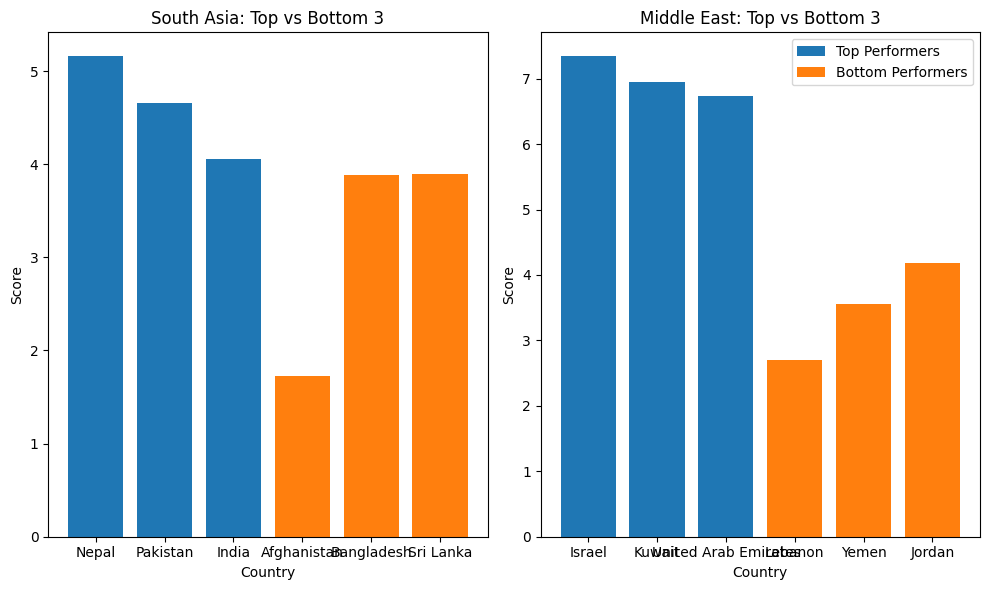

In [11]:
# Identify the top 3 and bottom 3 countries in each region based on the score.

top_3_performing_south_asia = south_asia_df.nlargest(3, 'score')
bottom_3_performing_south_asia = south_asia_df.nsmallest(3, 'score')
top_3_performing_middle_east = middle_east_df.nlargest(3, 'score')
bottom_3_performing_middle_east = middle_east_df.nsmallest(3,   'score')
print("Top 3 South Asia Countries:", top_3_performing_south_asia[['Country name', 'score']])
print("Bottom 3 South Asia Countries:", bottom_3_performing_south_asia[['Country name', 'score']])
print("Top 3 Middle East Countries:", top_3_performing_middle_east[['Country name', 'score']])
print("Bottom 3 Middle East Countries:", bottom_3_performing_middle_east[['Country name', 'score']])

# Plot bar charts comparing these charts.
top_south_asia = top_3_performing_south_asia[['Country name', 'score']]
bottom_south_asia = bottom_3_performing_south_asia[['Country name', 'score']]
top_middle_east = top_3_performing_middle_east[['Country name', 'score']]
bottom_middle_east = bottom_3_performing_middle_east[['Country name', 'score']]
plt.figure(figsize=(10,6))
# South Asia
plt.subplot(1, 2, 1)
plt.bar(top_south_asia['Country name'], top_south_asia['score'], label='Top Performers')
plt.bar(bottom_south_asia['Country name'], bottom_south_asia['score'], label='Bottom Performers')
plt.title("South Asia: Top vs Bottom 3")
plt.xlabel("Country")
plt.ylabel("Score")
# Middle East
plt.subplot(1, 2, 2)
plt.bar(top_middle_east['Country name'], top_middle_east['score'],  label='Top Performers')
plt.bar(bottom_middle_east['Country name'], bottom_middle_east['score'], label='Bottom Performers')
plt.title("Middle East: Top vs Bottom 3")
plt.xlabel("Country")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

Metric Comparisons:

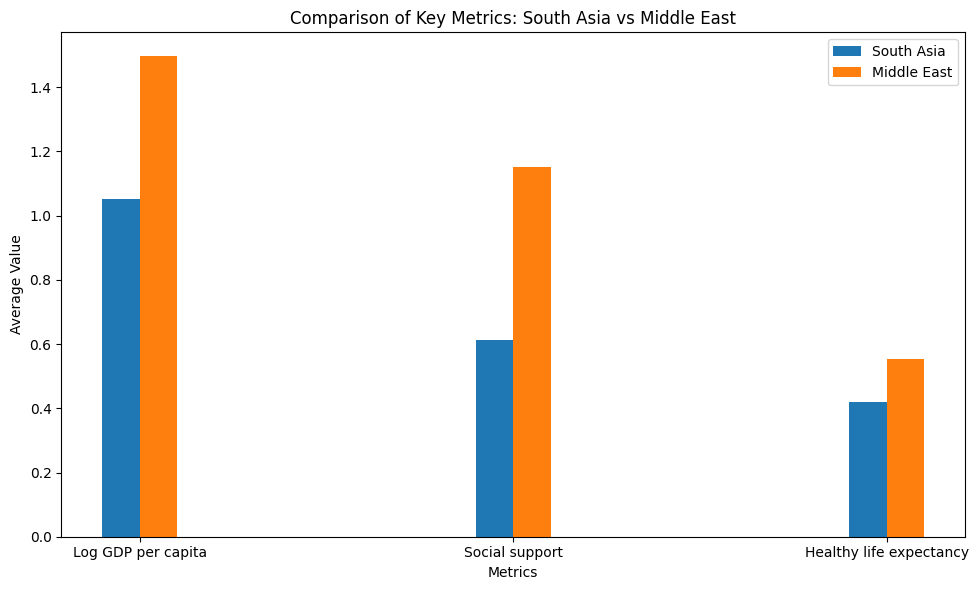

In [12]:
# Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

south_asia_gdp = south_asia_df['Log GDP per capita'].mean()
south_asia_social_support = south_asia_df['Social support'].mean()
south_asia_life_expectancy = south_asia_df['Healthy life expectancy'].mean()
middle_east_gdp = middle_east_df['Log GDP per capita'].mean()
middle_east_social_support = middle_east_df['Social support'].mean()
middle_east_life_expectancy = middle_east_df['Healthy life expectancy'].mean()


metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_values = [south_asia_gdp, south_asia_social_support, south_asia_life_expectancy]
middle_east_values = [middle_east_gdp, middle_east_social_support, middle_east_life_expectancy]


x = np.arange(len(metrics))
width = 0.10

plt.figure(figsize=(10,6))

plt.bar(x - width/2, south_asia_values, width, label='South Asia')
plt.bar(x + width/2, middle_east_values, width, label='Middle East')
plt.xticks(x, metrics)
plt.xlabel("Metrics")
plt.ylabel("Average Value")
plt.title("Comparison of Key Metrics: South Asia vs Middle East")
plt.legend()

plt.tight_layout()
plt.show()

Happiness Disparity:

In [13]:
#  Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
# South Asia
south_score = south_asia_df['score']

south_asia_range = south_score.max() - south_score.min()
south_asia_cv = south_score.std() / south_score.mean()

print("South Asia Range:", south_asia_range)
print("South Asia CV:", south_asia_cv)

# Middle East
middle_score = middle_east_df['score']

middle_asia_range = middle_score.max() - middle_score.min()
middle_asia_cv = middle_score.std() / middle_score.mean()

print("Middle East Range:", middle_asia_range)
print("Middle East CV:", middle_asia_cv)

South Asia Range: 3.4370000000000003
South Asia CV: 0.3021482883337427
Middle East Range: 4.634
Middle East CV: 0.28938880812119405


Correlation Analysis:

South Asia correlation between Score and Freedom: 0.8005185224163315
South Asia correlation between Score and Generosity: 0.874512371253192
Middle East correlation between Score and Freedom: 0.8632202433827544
Middle East correlation between Score and Generosity: 0.6275236536964182


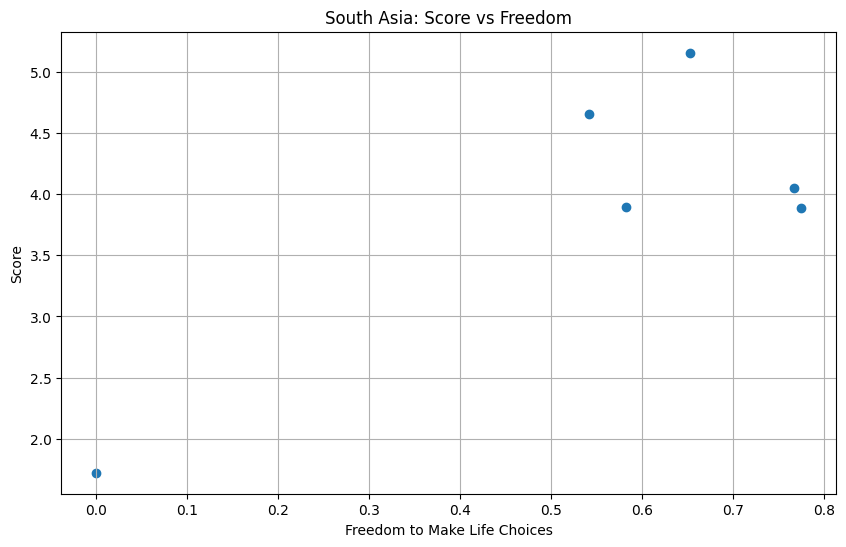

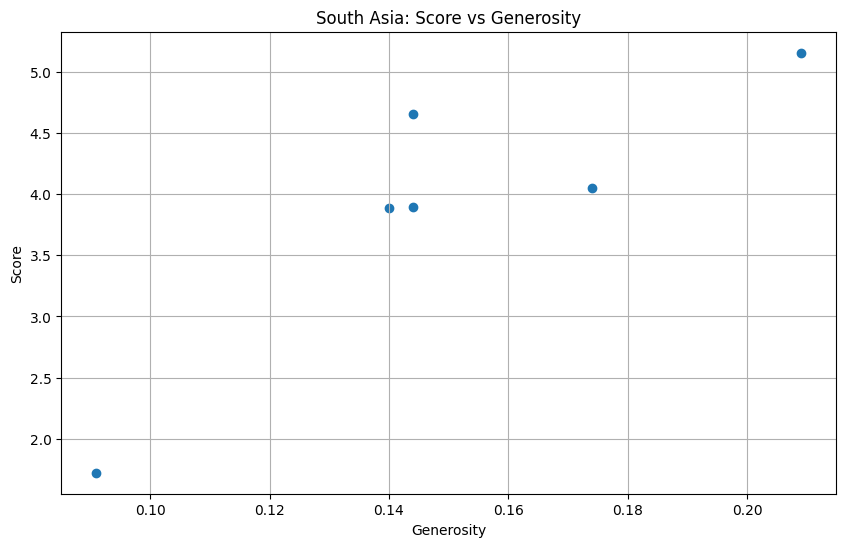

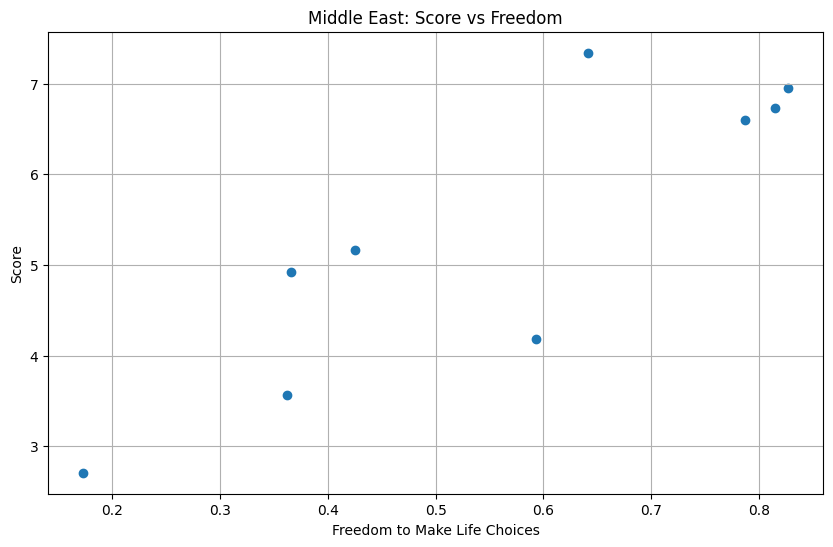

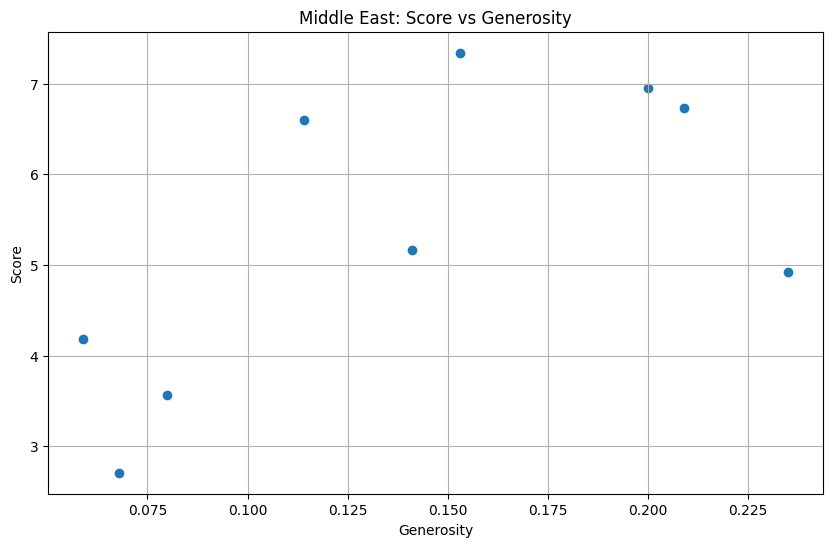

In [14]:
# Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

metric1 = 'Freedom to make life choices'
metric2 = 'Generosity'

south_corr_metric1 = south_asia_df['score'].corr(south_asia_df[metric1])
south_corr_metric2 = south_asia_df['score'].corr(south_asia_df[metric2])

print("South Asia correlation between Score and Freedom:", south_corr_metric1)
print("South Asia correlation between Score and Generosity:", south_corr_metric2)

middle_corr_metric1 = middle_east_df['score'].corr(middle_east_df[metric1])
middle_corr_metric2 = middle_east_df['score'].corr(middle_east_df[metric2])

print("Middle East correlation between Score and Freedom:", middle_corr_metric1)
print("Middle East correlation between Score and Generosity:", middle_corr_metric2)

# Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(10,6))
plt.scatter(south_asia_df['Freedom to make life choices'], south_asia_df['score'])
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('South Asia: Score vs Freedom')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(south_asia_df['Generosity'], south_asia_df['score'])
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('South Asia: Score vs Generosity')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(middle_east_df['Freedom to make life choices'], middle_east_df['score'])
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('Middle East: Score vs Freedom')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(middle_east_df['Generosity'], middle_east_df['score'])
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Middle East: Score vs Generosity')
plt.grid(True)
plt.show()

Outlier Detection:

    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


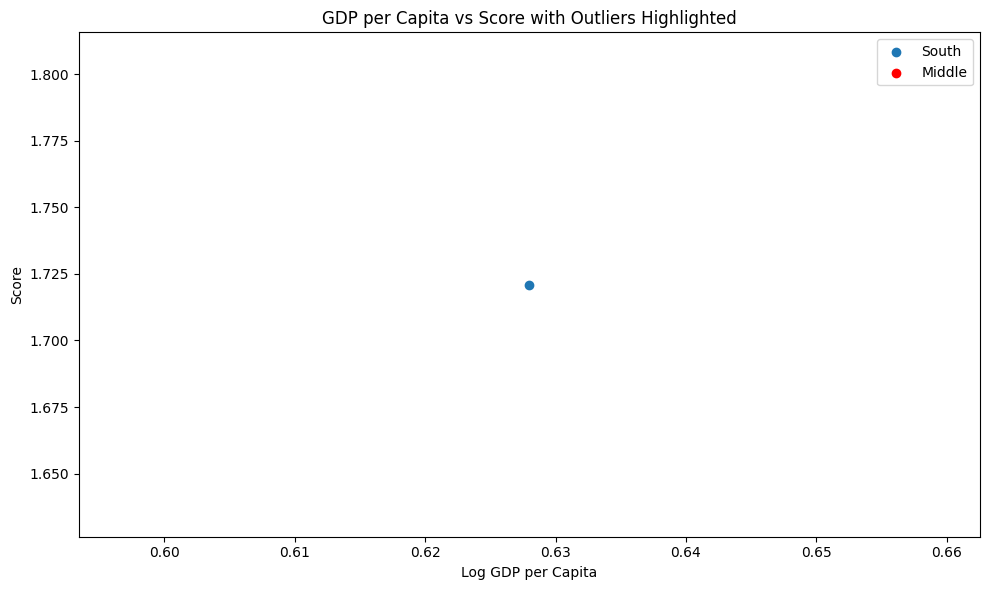

In [15]:
# Identify outlier countries in both regions based on Score and GDP per Capita.
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers
outlier_scores_south = identify_outliers(south_asia_df['score'])
outlier_gdp_south = identify_outliers(south_asia_df['Log GDP per capita'])
outlier_scores_middle = identify_outliers(middle_east_df['score'])
outlier_gdp_middle = identify_outliers(middle_east_df['Log GDP per capita'])
outlier_countries_south = south_asia_df[
    south_asia_df['score'].isin(outlier_scores_south) |
    south_asia_df['Log GDP per capita'].isin(outlier_gdp_south)
]
outlier_countries_middle = middle_east_df[
    middle_east_df['score'].isin(outlier_scores_middle) |
    middle_east_df['Log GDP per capita'].isin(outlier_gdp_middle)
]
print(outlier_countries_south[['Country name', 'score', 'Log GDP per capita']])
print(outlier_countries_middle[['Country name', 'score', 'Log GDP per capita']])


# Plot these outliers and discuss their implications.
plt.figure(figsize=(10,6))
outlier1= outlier_countries_south[['score', 'Log GDP per capita']]
outlier2 = outlier_countries_middle[['score', 'Log GDP per capita']]
plt.scatter(outlier1['Log GDP per capita'], outlier1['score'], label='South')
plt.scatter(outlier2['Log GDP per capita'], outlier2['score'], color='red', label='Middle')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('GDP per Capita vs Score with Outliers Highlighted')
plt.legend()
plt.tight_layout()
plt.show()

Visualization:

/tmp/ipython-input-3336990261.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([south_asia_df['score'], middle_east_df['score']], labels=['South Asia', 'Middle East'])


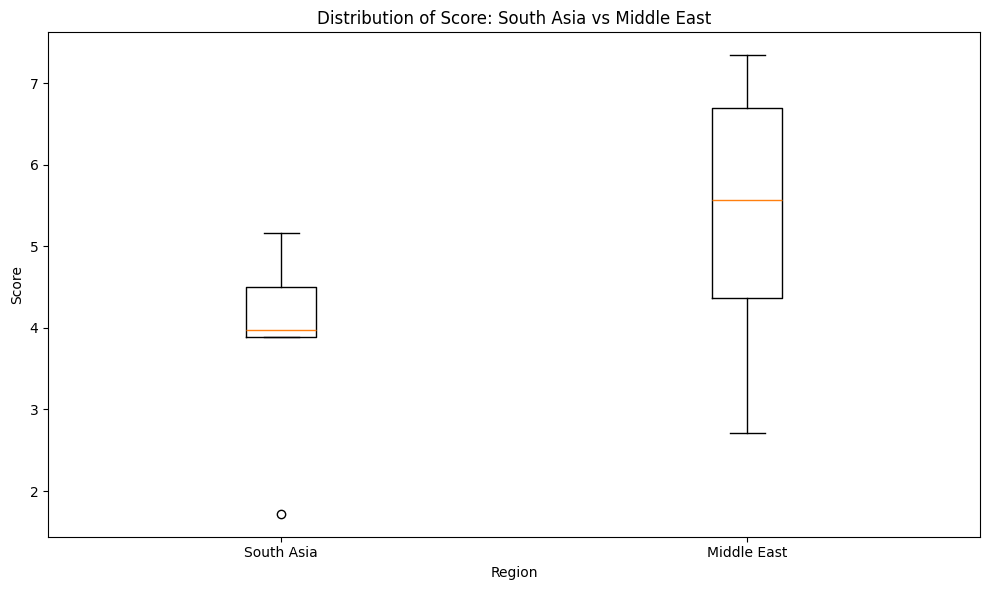

In [16]:
# Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(10,6))
plt.boxplot([south_asia_df['score'], middle_east_df['score']], labels=['South Asia', 'Middle East'])
plt.xlabel('Region')
plt.ylabel('Score')
plt.title('Distribution of Score: South Asia vs Middle East')
plt.tight_layout()
plt.show()